In [1]:
# Import Libraries 

import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

import numpy.random as nr
import matplotlib.pyplot as plt

import scipy.stats as ss
import math


%matplotlib inline

In [2]:
# pip install scikit-learn

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
y1_data= pd.read_csv('year1.csv')
y2_data = pd.read_csv('year2.csv')
validation_data= pd.read_csv('year3.csv')


In [5]:
y1_data.head()

,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot
0,1,2697762.0,93.800003,5782,5738,ball,R,R,SI,1,1,-0.98,0.72,-1.23,4.10,3.70,1.82
1,1,2697773.0,95.599998,5782,5738,foul,R,R,FF,3,2,-0.38,0.96,-0.45,3.10,3.41,1.56
2,1,2697902.0,94.800003,5782,5842,foul,R,R,FF,1,0,-0.62,1.16,0.31,2.40,3.41,1.56
3,1,2697993.0,87.300003,5782,5041,ball,R,R,SL,2,1,0.82,-0.06,1.11,2.21,3.70,1.73
4,1,2697995.0,98.599998,5782,5041,called_strike,R,R,FF,3,1,-0.33,0.95,-0.35,3.39,3.70,1.70


In [6]:
y2_data.head()

,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot
0,2,3398682.0,93.000000,6351,5763,ball,L,R,FF,2,1,-1.08,0.68,-1.04,4.14,3.30,1.48
1,2,3398692.0,87.800003,6351,5763,ball,L,R,SL,3,2,0.80,0.06,2.16,1.38,3.32,1.51
2,2,3398660.0,87.099998,6859,6222,ball,R,R,SL,1,0,0.49,0.44,0.05,3.53,3.23,1.47
3,2,3398685.0,94.400002,6859,6222,called_strike,R,R,FF,3,1,-0.50,1.39,0.70,2.19,3.20,1.33
4,2,3398652.0,88.300003,6411,6222,called_strike,L,R,CH,0,0,-0.98,0.30,0.51,2.15,3.66,1.74


In [7]:
# Convert the pitch_id columns from each dataset to sets
pitch_ids_year1 = set(y1_data['pitch_id'])
pitch_ids_year2 = set(y2_data['pitch_id'])

# Finding the intersection of these sets to get common pitch_ids
common_pitch_ids = pitch_ids_year1.intersection(pitch_ids_year2)

# Convert to list and print the common pitch_ids
common_pitch_ids_list = list(common_pitch_ids)
print(f"Common Pitch IDs between Year 1 and Year 2: {common_pitch_ids_list}")
print(f"Total common Pitch IDs: {len(common_pitch_ids_list)}")


Common Pitch IDs between Year 1 and Year 2: []
Total common Pitch IDs: 0


# Combined the Data and called it Train Data

In [8]:
train_data = pd.concat([y1_data, y2_data], ignore_index=True)

# Display the first few rows of the combined dataset 
train_data.head()
  

,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot
0,1,2697762.0,93.800003,5782,5738,ball,R,R,SI,1,1,-0.98,0.72,-1.23,4.10,3.70,1.82
1,1,2697773.0,95.599998,5782,5738,foul,R,R,FF,3,2,-0.38,0.96,-0.45,3.10,3.41,1.56
2,1,2697902.0,94.800003,5782,5842,foul,R,R,FF,1,0,-0.62,1.16,0.31,2.40,3.41,1.56
3,1,2697993.0,87.300003,5782,5041,ball,R,R,SL,2,1,0.82,-0.06,1.11,2.21,3.70,1.73
4,1,2697995.0,98.599998,5782,5041,called_strike,R,R,FF,3,1,-0.33,0.95,-0.35,3.39,3.70,1.70


In [9]:
train_data['pitch_type'].unique()


array(['SI', 'FF', 'SL', 'KC', 'CH', 'CU', 'FC', 'ST', 'FS', 'CS', 'SV',
       'FA', 'PO', 'SC', 'EP', nan, 'KN'], dtype=object)

In [10]:
train_data['description'].unique()

array(['ball', 'foul', 'called_strike', 'blocked_ball', 'hit_into_play',
       'hit_by_pitch', 'swinging_strike', 'foul_tip', 'foul_bunt',
       'swinging_strike_blocked', 'missed_bunt', 'pitchout',
       'bunt_foul_tip', 'foul_pitchout'], dtype=object)

In [11]:
train_data['pitch_type'].value_counts()

pitch_type
FF    486374
SL    251511
SI    218325
CH    159557
CU    108924
FC    100982
KC     30805
ST     30403
FS     22517
SV      5092
FA      2105
EP       642
CS       252
KN        88
PO        74
SC         1
Name: count, dtype: int64

# Quality Reports of Data

In [12]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)

In [13]:
quality_report(train_data)

,Total NaN,Percent of NaN,Nunique,Dtype
pfx_x,3460,0.243938,482,float64
pitch_id,1611,0.113579,1416781,float64
pfx_z,1477,0.104132,451,float64
sz_bot,824,0.058094,143,float64
plate_z,812,0.057248,999,float64
release_speed,779,0.054921,681,float64
sz_top,779,0.054921,181,float64
plate_x,779,0.054921,827,float64
pitch_type,740,0.052172,16,object
balls,0,0.000000,5,int64


# Visualizing data to see if it is Clean

<Axes: >

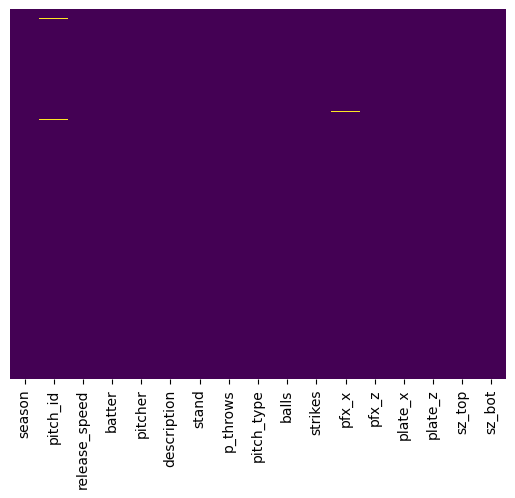

In [14]:
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# DATA PREPROCESSING

In [15]:
train_data['description'].unique()

array(['ball', 'foul', 'called_strike', 'blocked_ball', 'hit_into_play',
       'hit_by_pitch', 'swinging_strike', 'foul_tip', 'foul_bunt',
       'swinging_strike_blocked', 'missed_bunt', 'pitchout',
       'bunt_foul_tip', 'foul_pitchout'], dtype=object)

In [16]:
train_data['description'].value_counts()

description
ball                       472125
foul                       253213
hit_into_play              245982
called_strike              232500
swinging_strike            150718
blocked_ball                33376
foul_tip                    13740
swinging_strike_blocked      9187
hit_by_pitch                 4157
foul_bunt                    2680
missed_bunt                   575
pitchout                       73
bunt_foul_tip                  65
foul_pitchout                   1
Name: count, dtype: int64

Handling Missing Values My strategies for filling the missing values for each column based on the relationship with other available data rather than using center of measurement only:

release_speed Strategy: Impute missing release_speed using the median (because the data is not normally distributed, so median is better in such case than mean) release speed grouped by pitch_type. Pitch types generally correlate with certain speed ranges, so this can provide a reasonable estimate

plate_x and plate_z (horizontal and vertical pitch location) Strategy: The missing vakues were filled by imputing using mean values (because the data is normally distributed) grouped by pitch_type and release_speed, as certain pitch types and speeds tend to have consistent locations.

sz_top and sz_bot (top and bottom of the strike zone) Strategy: Since these measurements can vary by batter (due to height and stance), a good approach I could have use is to group by batter height and use the median because the data isnt normally distributed. So here i am assuming pitch types could have a consistent strike zone due to the way they are thrown (like a curveball typically being thrown lower), So i use pitch_type as a proxy for filling in strike zone values alongside the meadian( because the data are not normally distributed)

In [17]:
train_data.dropna(inplace=True)

In [18]:
quality_report(train_data)

,Total NaN,Percent of NaN,Nunique,Dtype
season,0,0.0,2,int64
balls,0,0.0,5,int64
sz_top,0,0.0,181,float64
plate_z,0,0.0,998,float64
plate_x,0,0.0,827,float64
pfx_z,0,0.0,451,float64
pfx_x,0,0.0,482,float64
strikes,0,0.0,4,int64
pitch_type,0,0.0,16,object
pitch_id,0,0.0,1412609,float64


# Confirming if Data is Cleaned

<Axes: >

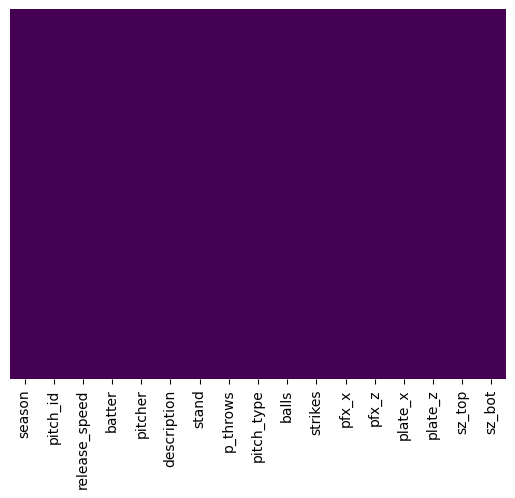

In [19]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
train_data.columns

Index(['season', 'pitch_id', 'release_speed', 'batter', 'pitcher',
       'description', 'stand', 'p_throws', 'pitch_type', 'balls', 'strikes',
       'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot'],
      dtype='object')

In [21]:
train_data['stand'].unique()


array(['R', 'L'], dtype=object)

In [22]:
train_data['p_throws'].unique()

array(['R', 'L'], dtype=object)

In [23]:
train_data['pitch_type'].unique()

array(['SI', 'FF', 'SL', 'KC', 'CH', 'CU', 'FC', 'ST', 'FS', 'CS', 'SV',
       'FA', 'PO', 'SC', 'EP', 'KN'], dtype=object)

# Transforming categorically variable

In [24]:
train_data['stand'] = np.where(train_data['stand'] == 'R', 1, -1)
train_data['p_throws'] = np.where(train_data['p_throws'] == 'R', 1, -1)

In [25]:
# Function to calculate if the pitch is a strike based on the description and strikes
def calculate_strike(row):
    if row['description'] in ['called_strike', 'swinging_strike', 'foul_tip', 'foul_bunt']:
        return 1  # These are all strikes
    elif row['description'] == 'foul':
        if row['strikes'] >= 2:
            return 1  # Foul counts as a strike if the batter already has 2 strikes
        else:
            return 0  # Foul does not count as a strike if the batter has fewer than 2 strikes
    else:
        return 0  # All other descriptions are not strikes

# Apply the function to create the 'Strike' column
train_data['Strike'] = train_data.apply(calculate_strike, axis=1)

# Display the first few rows of the dataframe to verify the results
train_data.head()

,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,Strike
0,1,2697762.0,93.800003,5782,5738,ball,1,1,SI,1,1,-0.98,0.72,-1.23,4.10,3.70,1.82,0
1,1,2697773.0,95.599998,5782,5738,foul,1,1,FF,3,2,-0.38,0.96,-0.45,3.10,3.41,1.56,1
2,1,2697902.0,94.800003,5782,5842,foul,1,1,FF,1,0,-0.62,1.16,0.31,2.40,3.41,1.56,0
3,1,2697993.0,87.300003,5782,5041,ball,1,1,SL,2,1,0.82,-0.06,1.11,2.21,3.70,1.73,0
4,1,2697995.0,98.599998,5782,5041,called_strike,1,1,FF,3,1,-0.33,0.95,-0.35,3.39,3.70,1.70,1


In [26]:
train_data['Strike'].unique()

array([0, 1], dtype=int64)

In [27]:
train_data['Strike'].value_counts()

Strike
0    917554
1    495055
Name: count, dtype: int64

In [28]:
train_data.head()

,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,Strike
0,1,2697762.0,93.800003,5782,5738,ball,1,1,SI,1,1,-0.98,0.72,-1.23,4.10,3.70,1.82,0
1,1,2697773.0,95.599998,5782,5738,foul,1,1,FF,3,2,-0.38,0.96,-0.45,3.10,3.41,1.56,1
2,1,2697902.0,94.800003,5782,5842,foul,1,1,FF,1,0,-0.62,1.16,0.31,2.40,3.41,1.56,0
3,1,2697993.0,87.300003,5782,5041,ball,1,1,SL,2,1,0.82,-0.06,1.11,2.21,3.70,1.73,0
4,1,2697995.0,98.599998,5782,5041,called_strike,1,1,FF,3,1,-0.33,0.95,-0.35,3.39,3.70,1.70,1


In [29]:
train_data['season'].unique()

array([1, 2], dtype=int64)

In [30]:
# train_data['description'] = pd.factorize(train_data['description'])[0]

In [31]:
train_data['Strike'].value_counts()

Strike
0    917554
1    495055
Name: count, dtype: int64

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412609 entries, 0 to 1418391
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   season         1412609 non-null  int64  
 1   pitch_id       1412609 non-null  float64
 2   release_speed  1412609 non-null  float64
 3   batter         1412609 non-null  int64  
 4   pitcher        1412609 non-null  int64  
 5   description    1412609 non-null  object 
 6   stand          1412609 non-null  int32  
 7   p_throws       1412609 non-null  int32  
 8   pitch_type     1412609 non-null  object 
 9   balls          1412609 non-null  int64  
 10  strikes        1412609 non-null  int64  
 11  pfx_x          1412609 non-null  float64
 12  pfx_z          1412609 non-null  float64
 13  plate_x        1412609 non-null  float64
 14  plate_z        1412609 non-null  float64
 15  sz_top         1412609 non-null  float64
 16  sz_bot         1412609 non-null  float64
 17  Strike       

In [33]:
new_train_data = train_data 

In [34]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412609 entries, 0 to 1418391
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   season         1412609 non-null  int64  
 1   pitch_id       1412609 non-null  float64
 2   release_speed  1412609 non-null  float64
 3   batter         1412609 non-null  int64  
 4   pitcher        1412609 non-null  int64  
 5   description    1412609 non-null  object 
 6   stand          1412609 non-null  int32  
 7   p_throws       1412609 non-null  int32  
 8   pitch_type     1412609 non-null  object 
 9   balls          1412609 non-null  int64  
 10  strikes        1412609 non-null  int64  
 11  pfx_x          1412609 non-null  float64
 12  pfx_z          1412609 non-null  float64
 13  plate_x        1412609 non-null  float64
 14  plate_z        1412609 non-null  float64
 15  sz_top         1412609 non-null  float64
 16  sz_bot         1412609 non-null  float64
 17  Strike       

# DAG

In [35]:
from causalgraphicalmodels import CausalGraphicalModel
import graphviz
from graphviz import Digraph

In [36]:
# First, filter the data to exclude FS, KC, pitch types
filtered_data = new_train_data[~new_train_data['pitch_type'].isin(['FS', 'KC'])]

# Stratified and Descriptive Analysis 

In [37]:
 # Step 2: Standardize continuous predictors
continuous_cols = ['release_speed', 'pfx_x', 'pfx_z', 'sz_top', 'sz_bot']
# new_train_data[continuous_cols] = new_train_data[continuous_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=0)

# Step 3: Stratified Sampling by Both Pitch Type and Batter
n_samples = 5000  # Number of samples you want to take
stratified_sample = filtered_data.groupby(['pitch_type', 'batter'], group_keys=False).apply(
    lambda x: x.sample(frac=n_samples / len(filtered_data), random_state=42)
)


In [38]:
stratified_sample.head()

,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,Strike
874315,2,3143949.0,87.300003,5001,5604,called_strike,1,1,CH,0,0,-1.43,0.74,0.03,2.08,3.38,1.67,1
1180535,2,3240679.0,86.300003,5002,6382,called_strike,1,-1,CH,2,1,1.14,0.58,0.07,2.98,3.39,1.67,1
535455,1,2178275.0,84.300003,5008,6081,hit_into_play,1,-1,CH,2,2,1.26,0.15,0.12,2.18,3.32,1.51,0
245566,1,2474328.0,81.800003,5015,5142,foul,1,-1,CH,0,0,1.19,1.15,0.63,3.07,3.32,1.51,0
1056360,2,3149902.0,86.400002,5016,6558,ball,1,-1,CH,0,1,1.34,0.36,0.10,0.91,3.56,1.65,0


In [39]:
stratified_sample.describe()

,season,pitch_id,release_speed,batter,pitcher,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,Strike
count,4593.000000,4.593000e+03,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000
mean,1.498803,2.708292e+06,89.454997,5864.289789,5878.709340,0.203135,0.434792,0.908121,0.903984,-0.139223,0.711389,0.033327,2.312931,3.386586,1.585711,0.341389
std,0.500053,4.081415e+05,5.880015,553.825136,546.783282,0.979257,0.900629,0.969844,0.833303,0.861017,0.716910,0.847312,0.979652,0.177814,0.103237,0.474227
min,1.000000,2.000680e+06,65.099998,5001.000000,5006.000000,-1.000000,-1.000000,0.000000,0.000000,-2.040000,-1.890000,-3.280000,-1.370000,2.640000,0.970000,0.000000
25%,1.000000,2.361695e+06,85.500000,5383.000000,5438.000000,-1.000000,-1.000000,0.000000,0.000000,-0.870000,0.270000,-0.550000,1.670000,3.290000,1.520000,0.000000
50%,1.000000,2.707430e+06,90.800003,5823.000000,5815.000000,1.000000,1.000000,1.000000,1.000000,-0.230000,0.810000,0.030000,2.320000,3.390000,1.590000,0.000000
75%,2.000000,3.054780e+06,94.000000,6324.000000,6278.000000,1.000000,1.000000,2.000000,2.000000,0.520000,1.310000,0.610000,2.960000,3.490000,1.640000,1.000000
max,2.000000,3.418321e+06,102.199997,7129.000000,7165.000000,1.000000,1.000000,3.000000,2.000000,1.920000,2.260000,3.040000,5.740000,4.090000,2.010000,1.000000


# Strike Outcome

In [40]:

strike_outcomes = stratified_sample['Strike'].value_counts().sort_index()  # To ensures 0, 1, 2 are in order
strike_percentages = stratified_sample['Strike'].value_counts(normalize=True).sort_index() * 100  # In %

strike_summary = pd.DataFrame({
    'Count': strike_outcomes,
    'Percentage (%)': strike_percentages.round(2)
})

strike_summary


,Count,Percentage (%)
Strike,,
0,3025,65.86
1,1568,34.14


In [41]:
n_samples = 5000  # Number of samples I am Interested in
stratified_sample = filtered_data.groupby(['pitch_type', 'batter'], group_keys=False).apply(
    lambda x: x.sample(frac=n_samples / len(filtered_data), random_state=42)
)

In [52]:
stratified_sample['pitcher'].nunique()

832

In [54]:
# Count the number of unique batters 
num_unique_batters = stratified_sample.index.get_level_values('batter').nunique()
print(num_unique_batters)


598


In [45]:
stratified_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4593 entries, 874315 to 964120
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         4593 non-null   int64  
 1   pitch_id       4593 non-null   float64
 2   release_speed  4593 non-null   float64
 3   batter         4593 non-null   int64  
 4   pitcher        4593 non-null   int64  
 5   description    4593 non-null   object 
 6   stand          4593 non-null   int32  
 7   p_throws       4593 non-null   int32  
 8   pitch_type     4593 non-null   object 
 9   balls          4593 non-null   int64  
 10  strikes        4593 non-null   int64  
 11  pfx_x          4593 non-null   float64
 12  pfx_z          4593 non-null   float64
 13  plate_x        4593 non-null   float64
 14  plate_z        4593 non-null   float64
 15  sz_top         4593 non-null   float64
 16  sz_bot         4593 non-null   float64
 17  Strike         4593 non-null   int64  
dtypes: flo

In [43]:
# To see the count of each unique stand (batter side of the plate) in the data
stand_counts = stratified_sample['stand'].value_counts()
print(stand_counts)

stand
 1    2763
-1    1830
Name: count, dtype: int64


#  Strike Count

In [38]:
import pandas as pd


strike_counts = stratified_sample['strikes'].value_counts().sort_index()  #To ensures 0, 1, 2 are in order
strike_percentages = stratified_sample['strikes'].value_counts(normalize=True).sort_index() * 100  # In %

strike_summary = pd.DataFrame({
    'Count': strike_counts,
    'Percentage (%)': strike_percentages.round(2)
})

strike_summary


,Count,Percentage (%)
strikes,,
0,1836,39.97
1,1362,29.65
2,1395,30.37


# Panel Logist Regression

In [55]:
import pandas as pd
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Stratified sampling by 'pitch_type' and 'batter'
n_samples = 5000  #
stratified_sample = filtered_data.groupby(['pitch_type', 'batter'], group_keys=False).apply(
    lambda x: x.sample(frac=n_samples / len(filtered_data), random_state=42)
)

stratified_sample  = pd.get_dummies(stratified_sample, columns=['pitch_type'], drop_first=True)

stratified_sample.set_index(['batter', 'pitch_id'], inplace=True)

# Standardize release_speed before squaring
stratified_sample['release_speed_z'] = (stratified_sample['release_speed'] - stratified_sample['release_speed'].mean()) / stratified_sample['release_speed'].std()

# Create squared variables for pitch location
stratified_sample['plate_z_sq'] = stratified_sample['plate_z'] ** 2
stratified_sample['plate_x_sq'] = stratified_sample['plate_x'] ** 2
stratified_sample['sz_top_sq'] = stratified_sample['sz_top'] 
stratified_sample['sz_bot_sq'] = stratified_sample['sz_bot']

# Define the variables (predictors)
pitch_type_dummies = [col for col in stratified_sample.columns if col.startswith('pitch_type_')]
X = stratified_sample[['release_speed_z', 'plate_z_sq', 'plate_x_sq', 'sz_top_sq', 'sz_bot_sq'] + pitch_type_dummies]
X = sm.add_constant(X)

# the y (outcome)
y = stratified_sample['Strike']

# Fit panel model with fixed effects for batters
model = PanelOLS(y, X, entity_effects=True)
result = model.fit()


In [56]:
print(result.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 Strike   R-squared:                        0.0704
Estimator:                   PanelOLS   R-squared (Between):              0.0600
No. Observations:                4593   R-squared (Within):               0.0704
Date:                Sun, Apr 27 2025   R-squared (Overall):              0.0657
Time:                        21:57:00   Log-likelihood                   -2603.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      27.427
Entities:                         598   P-value                           0.0000
Avg Obs:                       7.6806   Distribution:                 F(11,3984)
Min Obs:                       1.0000                                           
Max Obs:                       21.000   F-statistic (robust):             27.427
                            

In [ ]:
# pip install linearmodels

# Pitch Type Frequency

In [60]:

n_samples = 5000 
stratified_sample = filtered_data.groupby(['pitch_type', 'batter'], group_keys=False).apply(
    lambda x: x.sample(frac=n_samples / len(filtered_data), random_state=42)
)

In [62]:
import pandas as pd


pitch_type_counts = stratified_sample['pitch_type'].value_counts().reset_index()
pitch_type_counts.columns = ['pitch_type', 'total_count']

pitch_type_counts['total_percentage'] = (pitch_type_counts['total_count'] / len(stratified_sample)) * 100

# Calculate counts where Strike == 1 (called strike)
strike_counts = stratified_sample[stratified_sample['Strike'] == 1]['pitch_type'].value_counts().reset_index()
strike_counts.columns = ['pitch_type', 'strike_count']

# SCalculate counts where Strike == 0 (no strike)
no_strike_counts = stratified_sample[stratified_sample['Strike'] == 0]['pitch_type'].value_counts().reset_index()
no_strike_counts.columns = ['pitch_type', 'no_strike_count']

# Merge all results together
result_table = pitch_type_counts.merge(strike_counts, on='pitch_type', how='left').merge(no_strike_counts, on='pitch_type', how='left')

#  Calculate strike and no-strike percentages
result_table['strike_percentage'] = (result_table['strike_count'] / result_table['total_count']) * 100
result_table['no_strike_percentage'] = (result_table['no_strike_count'] / result_table['total_count']) * 100

result_table = result_table.sort_values(by='total_count', ascending=False)

result_table

,pitch_type,total_count,total_percentage,strike_count,no_strike_count,strike_percentage,no_strike_percentage
0,FF,1731,37.687786,617,1114,35.644136,64.355864
1,SL,870,18.941868,313,557,35.977011,64.022989
2,SI,758,16.503375,251,507,33.113456,66.886544
3,CH,546,11.887655,162,384,29.670330,70.329670
4,CU,345,7.511430,113,232,32.753623,67.246377
5,FC,316,6.880035,101,215,31.962025,68.037975
6,ST,27,0.587851,11,16,40.740741,59.259259


# Speed and Strike outcomes Relationship

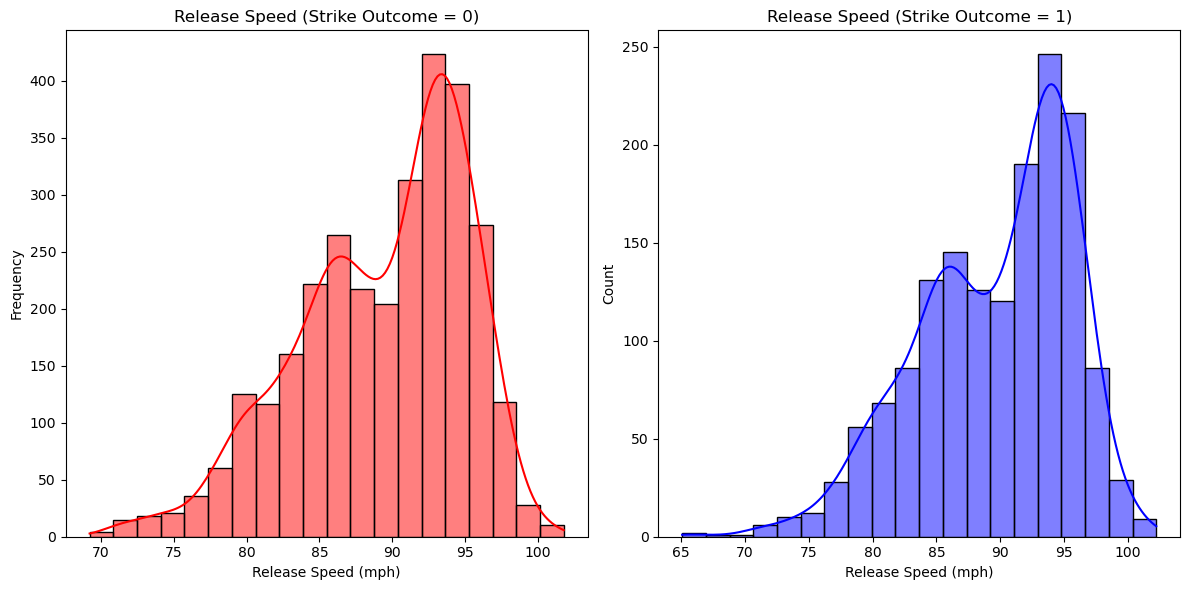

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# get strike outcome
strike_0 = stratified_sample[stratified_sample['Strike'] == 0]['release_speed']
strike_1 = stratified_sample[stratified_sample['Strike'] == 1]['release_speed']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(strike_0, kde=True, color='red', bins=20)
plt.title('Release Speed (Strike Outcome = 0)')
plt.xlabel('Release Speed (mph)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(strike_1, kde=True, color='blue', bins=20)
plt.title('Release Speed (Strike Outcome = 1)')
plt.xlabel('Release Speed (mph)')

plt.tight_layout()
plt.show()

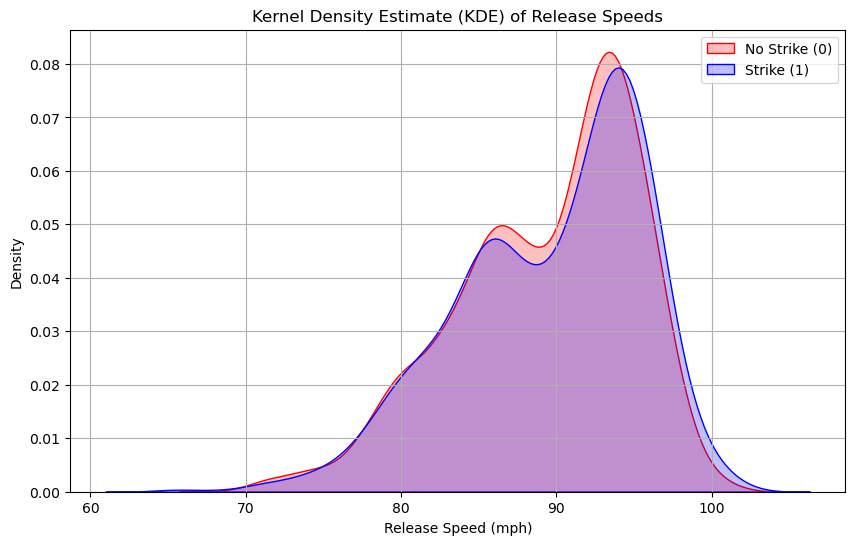

In [64]:
plt.figure(figsize=(10, 6))
sns.kdeplot(strike_0, color='red', label='No Strike (0)', fill=True)
sns.kdeplot(strike_1, color='blue', label='Strike (1)', fill=True)
plt.xlabel('Release Speed (mph)')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Release Speeds')
plt.legend()
plt.grid(True)
plt.show()

# Bayesian Analysis: Driect rffect of each variable

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [intercept, pitch_speed_coeff, plate_x_coeff, plate_z_coeff, sz_top_coeff, sz_bot_coeff, batter_random_effect, pitcher_random_effect, batter_pitch_type_random_effect]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 1839 seconds.


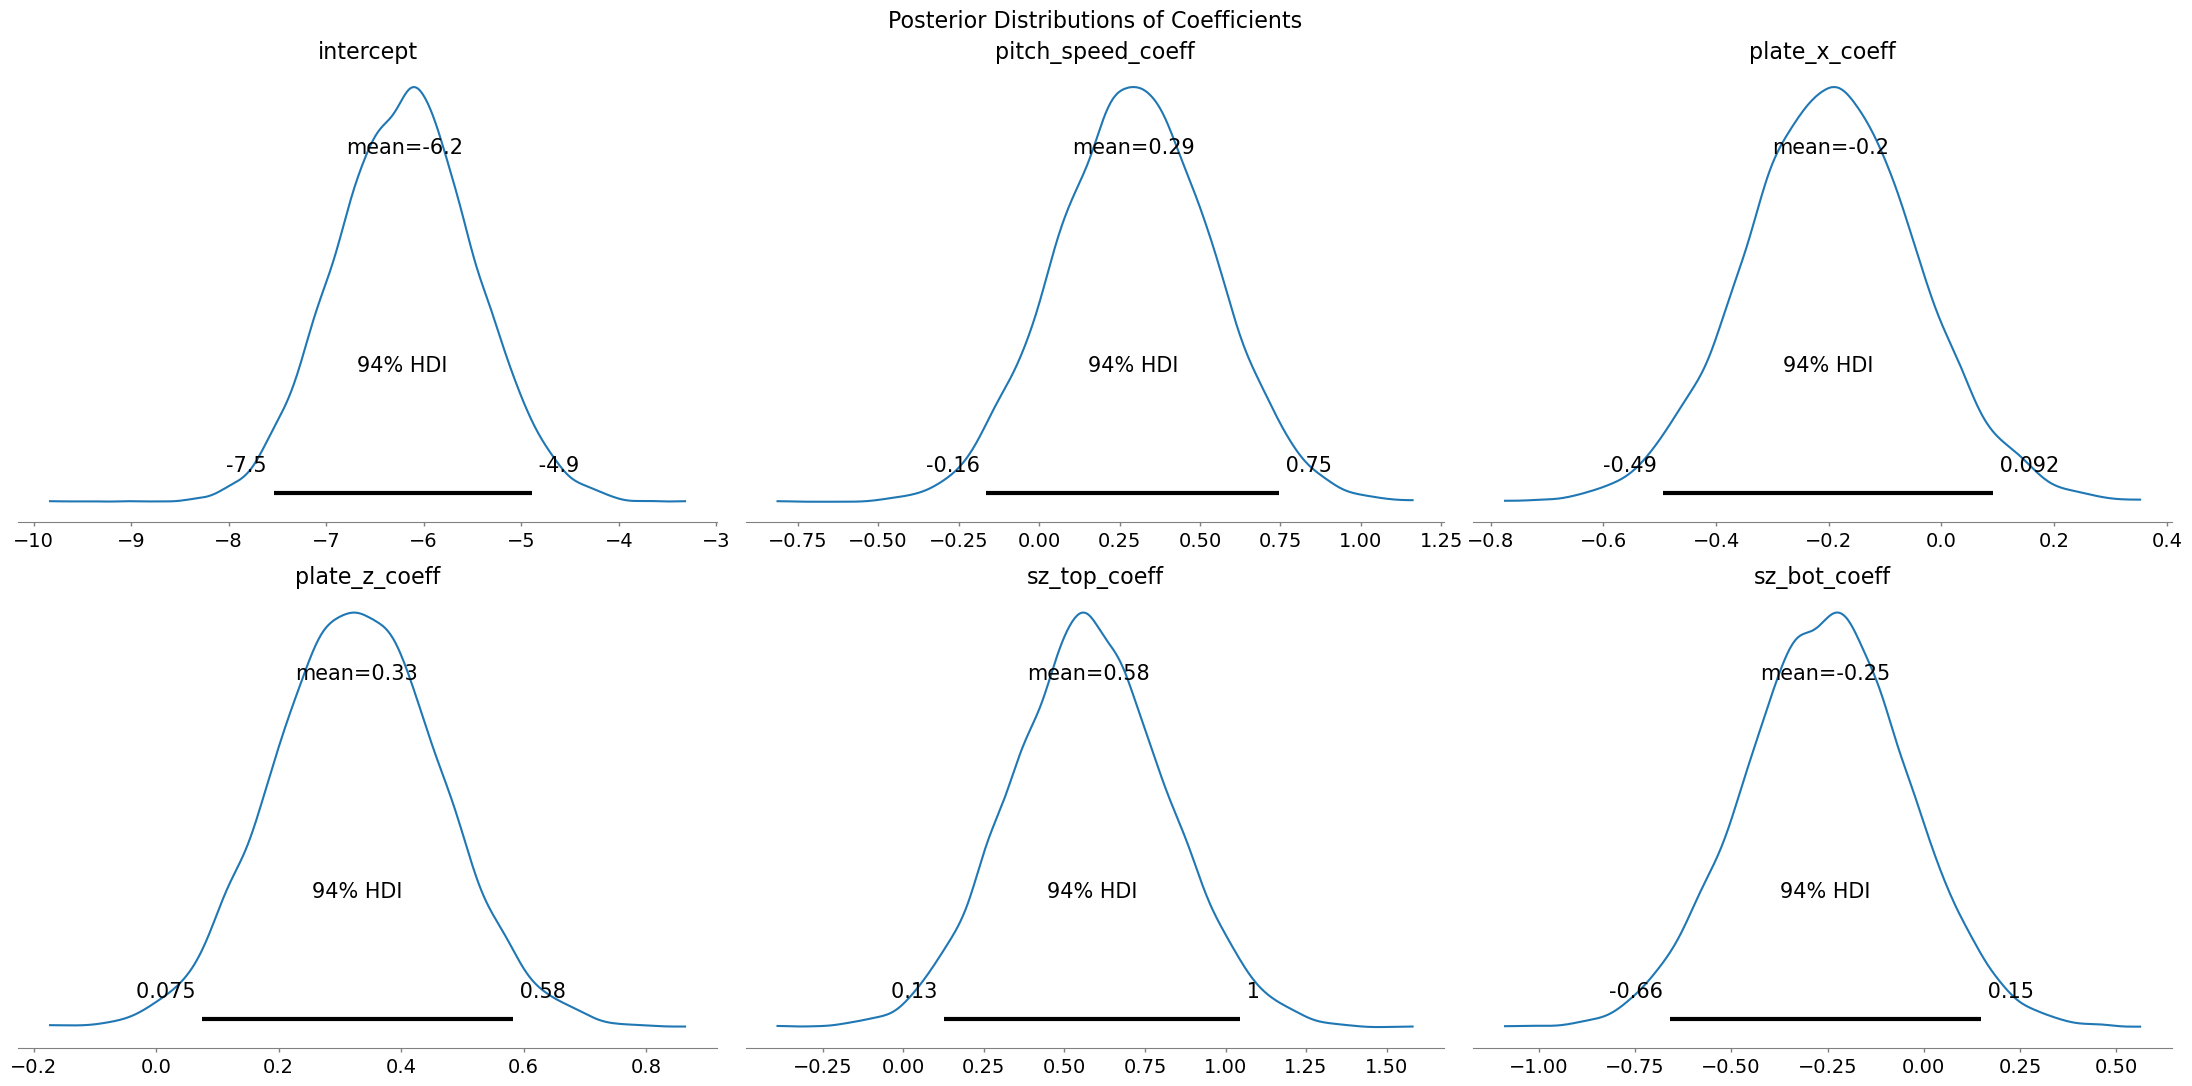

In [37]:

import pymc as pm  # PyMC3 for Bayesian modeling
import numpy as np
import pandas as pd
import arviz as az  # ArviZ for analysis and visualization of Bayesian models
import matplotlib.pyplot as plt


continuous_cols = ['release_speed', 'pfx_x', 'pfx_z', 'sz_top', 'sz_bot']
filtered_data[continuous_cols] =filtered_data[continuous_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=0)


n_samples = 5000  
stratified_sample = filtered_data.groupby(['pitch_type', 'batter'], group_keys=False).apply(
    lambda x: x.sample(frac=n_samples / len(filtered_data), random_state=42)
)


pitch_types = stratified_sample['pitch_type'].values
pitch_speeds = stratified_sample['release_speed'].values
stances = stratified_sample['stand'].values
plate_x = stratified_sample['plate_x'].values  # Horizontal location of pitch
plate_z = stratified_sample['plate_z'].values  # Vertical location of pitch
sz_top = stratified_sample['sz_top'].values  # Upper boundary of the strike zone
sz_bot = stratified_sample['sz_bot'].values  # Lower boundary of the strike zone

strikes = stratified_sample['Strike'].values

# Categorical variables (ID for batters, pitchers)
# Reindex batters and pitchers to zero-based indices
stratified_sample['batter'] = stratified_sample['batter'].astype('category').cat.codes
stratified_sample['pitcher'] = stratified_sample['pitcher'].astype('category').cat.codes

batters = stratified_sample['batter'].values
pitchers = stratified_sample['pitcher'].values
pitch_type = stratified_sample['pitch_type'].astype('category').cat.codes.values  #encoded pitch type

# Number of unique batters, pitchers, and pitch types
n_batters = len(stratified_sample['batter'].unique())
n_pitchers = len(stratified_sample['pitcher'].unique())
n_pitch_types = len(stratified_sample['pitch_type'].unique())

#Define the Bayesian Model
with pm.Model() as model:
    # Priors for fixed effects
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    pitch_speed_coeff = pm.Normal('pitch_speed_coeff', mu=0, sigma=10)
    plate_x_coeff = pm.Normal('plate_x_coeff', mu=0, sigma=10)
    plate_z_coeff = pm.Normal('plate_z_coeff', mu=0, sigma=10)
    sz_top_coeff = pm.Normal('sz_top_coeff', mu=0, sigma=10)  # For strike zone top
    sz_bot_coeff = pm.Normal('sz_bot_coeff', mu=0, sigma=10)  # For strike zone bottom

    # Random effects for batters (each batter has a unique baseline)
    batter_random_effect = pm.Normal('batter_random_effect', mu=0, sigma=10, shape=n_batters)

    # Random effects for pitchers (each pitcher has a unique baseline)
    pitcher_random_effect = pm.Normal('pitcher_random_effect', mu=0, sigma=10, shape=n_pitchers)

    # Random effects for batter-pitcher-pitch_type interaction
    batter_pitch_type_random_effect = pm.Normal('batter_pitch_type_random_effect', mu=0, sigma=10, shape=(n_batters, n_pitch_types))

    # Linear model (logit scale) for strike or not strike (binary outcome)
    linear_model = intercept + pitch_speed_coeff * pitch_speeds + plate_x_coeff * plate_x + plate_z_coeff * plate_z \
                    + sz_top_coeff * sz_top + sz_bot_coeff * sz_bot \
                    + batter_random_effect[batters] + pitcher_random_effect[pitchers] \
                    + batter_pitch_type_random_effect[batters, pitch_type]

    # Deterministic link (predicted probability for strike)
    strike_prob = pm.Deterministic('strike_prob', pm.math.sigmoid(linear_model))

    # Logistic likelihood for binary outcome (strike or ball), with class weights
    likelihood = pm.Bernoulli('likelihood', p=strike_prob, observed=strikes)

    # Inference using MCMC
    trace = pm.sample(5000, chains=2, cores=1, return_inferencedata=True)

# Summarize the Results
summary_stats = az.summary(trace, hdi_prob=0.95)
# print(summary_stats)


# Plot posterior distributions for fixed effects
az.plot_posterior(trace, var_names=['intercept', 'pitch_speed_coeff', 'plate_x_coeff', 'plate_z_coeff', 'sz_top_coeff', 'sz_bot_coeff'])
plt.suptitle('Posterior Distributions of Coefficients', fontsize=16)
plt.tight_layout()
plt.show()


# Posterior Distribution of Contrast Between Higher and Lower Plate_Z on Strike Likelihood

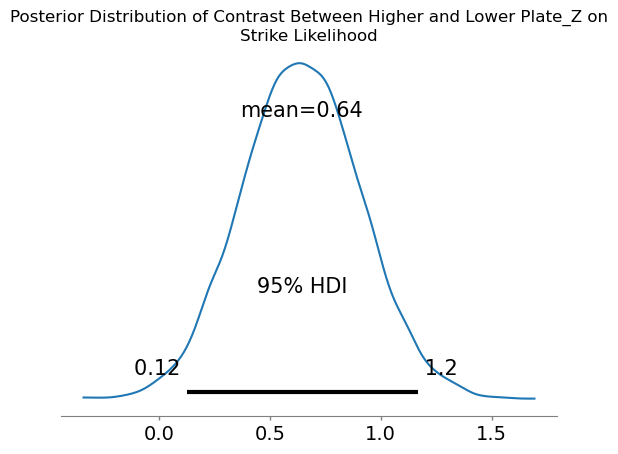

           mean     sd  hdi_2.5%  hdi_97.5%
contrast  0.642  0.268     0.125      1.166


In [39]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Extract posterior samples for plate_z_coeff
plate_z_coeff_samples = trace.posterior['plate_z_coeff'].values

# Define higher and lower values for plate_z using the mean and std of plate_z in the dataset (stratified_sample)
plate_z_mean = stratified_sample['plate_z'].mean()
plate_z_std = stratified_sample['plate_z'].std()

# Define higher and lower plate_z values
higher_plate_z = plate_z_mean + plate_z_std  # One standard deviation above the mean
lower_plate_z = plate_z_mean - plate_z_std  # One standard deviation below the mean

# Calculate the strike probability for higher and lower plate_z
higher_plate_z_log_odds = plate_z_coeff_samples * higher_plate_z  # Log-odds for higher plate_z
lower_plate_z_log_odds = plate_z_coeff_samples * lower_plate_z  # Log-odds for lower plate_z

# Calculate the contrast (difference between higher and lower plate_z conditions)
contrast_samples = higher_plate_z_log_odds - lower_plate_z_log_odds

# Convert contrast to InferenceData for visualization
contrast_idata = az.convert_to_inference_data({'contrast': contrast_samples})

# Plot the contrast
az.plot_posterior(contrast_idata, hdi_prob=0.95)
plt.title("Posterior Distribution of Contrast Between Higher and Lower Plate_Z on Strike Likelihood")
plt.show()

# Summary statistics of the contrast
contrast_summary = az.summary(contrast_idata, kind='stats', hdi_prob=0.95)
print(contrast_summary)


# Posterior Distributions of Coefficients

In [53]:
# Import necessary libraries
import pymc as pm  # PyMC3 for Bayesian modeling
import numpy as np
import pandas as pd
import arviz as az  # ArviZ for analysis and visualization of Bayesian models
import matplotlib.pyplot as plt


continuous_cols = ['release_speed', 'pfx_x', 'pfx_z', 'sz_top', 'sz_bot']
filtered_data[continuous_cols] =filtered_data[continuous_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=0)

n_samples = 5000  
stratified_sample = filtered_data.groupby(['pitch_type', 'batter'], group_keys=False).apply(
    lambda x: x.sample(frac=n_samples / len(filtered_data), random_state=42)
)

# Predictor Variables and Outcome Variable
pitch_types = stratified_sample['pitch_type'].values
pitch_speeds = stratified_sample['release_speed'].values
stances = stratified_sample['stand'].values
plate_x = stratified_sample['plate_x'].values  # Horizontal location of pitch
plate_z = stratified_sample['plate_z'].values  # Vertical location of pitch
sz_top = stratified_sample['sz_top'].values  # Upper boundary of the strike zone
sz_bot = stratified_sample['sz_bot'].values  # Lower boundary of the strike zone

# Outcome variable (strike or not)
strikes = stratified_sample['Strike'].values


stratified_sample['batter'] = stratified_sample['batter'].astype('category').cat.codes
stratified_sample['pitcher'] = stratified_sample['pitcher'].astype('category').cat.codes

batters = stratified_sample['batter'].values
pitchers = stratified_sample['pitcher'].values
pitch_type = stratified_sample['pitch_type'].astype('category').cat.codes.values  # Coded pitch type

# Number of unique batters, pitchers, and pitch types
n_batters = len(stratified_sample['batter'].unique())
n_pitchers = len(stratified_sample['pitcher'].unique())
n_pitch_types = len(stratified_sample['pitch_type'].unique())

# the Bayesian Model
with pm.Model() as model:
    # Priors for fixed effects
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    pitch_speed_coeff = pm.Normal('pitch_speed_coeff', mu=0, sigma=10)
    plate_x_coeff = pm.Normal('plate_x_coeff', mu=0, sigma=10)
    plate_z_coeff = pm.Normal('plate_z_coeff', mu=0, sigma=10)
    sz_top_coeff = pm.Normal('sz_top_coeff', mu=0, sigma=10)  # For strike zone top
    sz_bot_coeff = pm.Normal('sz_bot_coeff', mu=0, sigma=10)  # For strike zone bottom

    # Add fixed effects for pitch types (treat pitch_type as a categorical variable)
    pitch_type_coeffs = pm.Normal('pitch_type_coeffs', mu=0, sigma=10, shape=n_pitch_types)

    # Random effects for batters (each batter has a unique baseline)
    batter_random_effect = pm.Normal('batter_random_effect', mu=0, sigma=10, shape=n_batters)

    # Random effects for pitchers (each pitcher has a unique baseline)
    pitcher_random_effect = pm.Normal('pitcher_random_effect', mu=0, sigma=10, shape=n_pitchers)

    # Random effects for batter-pitcher-pitch_type interaction
    batter_pitch_type_random_effect = pm.Normal('batter_pitch_type_random_effect', mu=0, sigma=10, shape=(n_batters, n_pitch_types))

    # Linear model (logit scale) for strike or not strike (binary outcome)
    linear_model = intercept + pitch_speed_coeff * pitch_speeds + plate_x_coeff * plate_x + plate_z_coeff * plate_z \
                    + sz_top_coeff * sz_top + sz_bot_coeff * sz_bot \
                    + batter_random_effect[batters] + pitcher_random_effect[pitchers] \
                    + batter_pitch_type_random_effect[batters, pitch_type]

    # Add fixed effect for pitch type (use categorical pitch type coefficients)
    for i in range(n_pitch_types):
        linear_model += pitch_type_coeffs[i] * (pitch_type == i)

    # Deterministic link (predicted probability for strike)
    strike_prob = pm.Deterministic('strike_prob', pm.math.sigmoid(linear_model))

    # Logistic likelihood for binary outcome (strike or ball), with class weights
    likelihood = pm.Bernoulli('likelihood', p=strike_prob, observed=strikes)

    # Inference using MCMC
    trace = pm.sample(5000, chains=2, cores=1, return_inferencedata=True)

# Step 6: Summarize the Results
summary_stats = az.summary(trace, hdi_prob=0.95)
# print(summary_stats)

# Posterior Plots for Each Predictor Variable

# Plot posterior distributions for fixed effects
# az.plot_posterior(trace, var_names=['intercept', 'pitch_speed_coeff', 'plate_x_coeff', 'plate_z_coeff', 'sz_top_coeff', 'sz_bot_coeff', 'pitch_type_coeffs'])
# plt.suptitle('Posterior Distributions of Coefficients', fontsize=16)
# plt.tight_layout()
# plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [intercept, pitch_speed_coeff, plate_x_coeff, plate_z_coeff, sz_top_coeff, sz_bot_coeff, pitch_type_coeffs, batter_random_effect, pitcher_random_effect, batter_pitch_type_random_effect]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 8176 seconds.


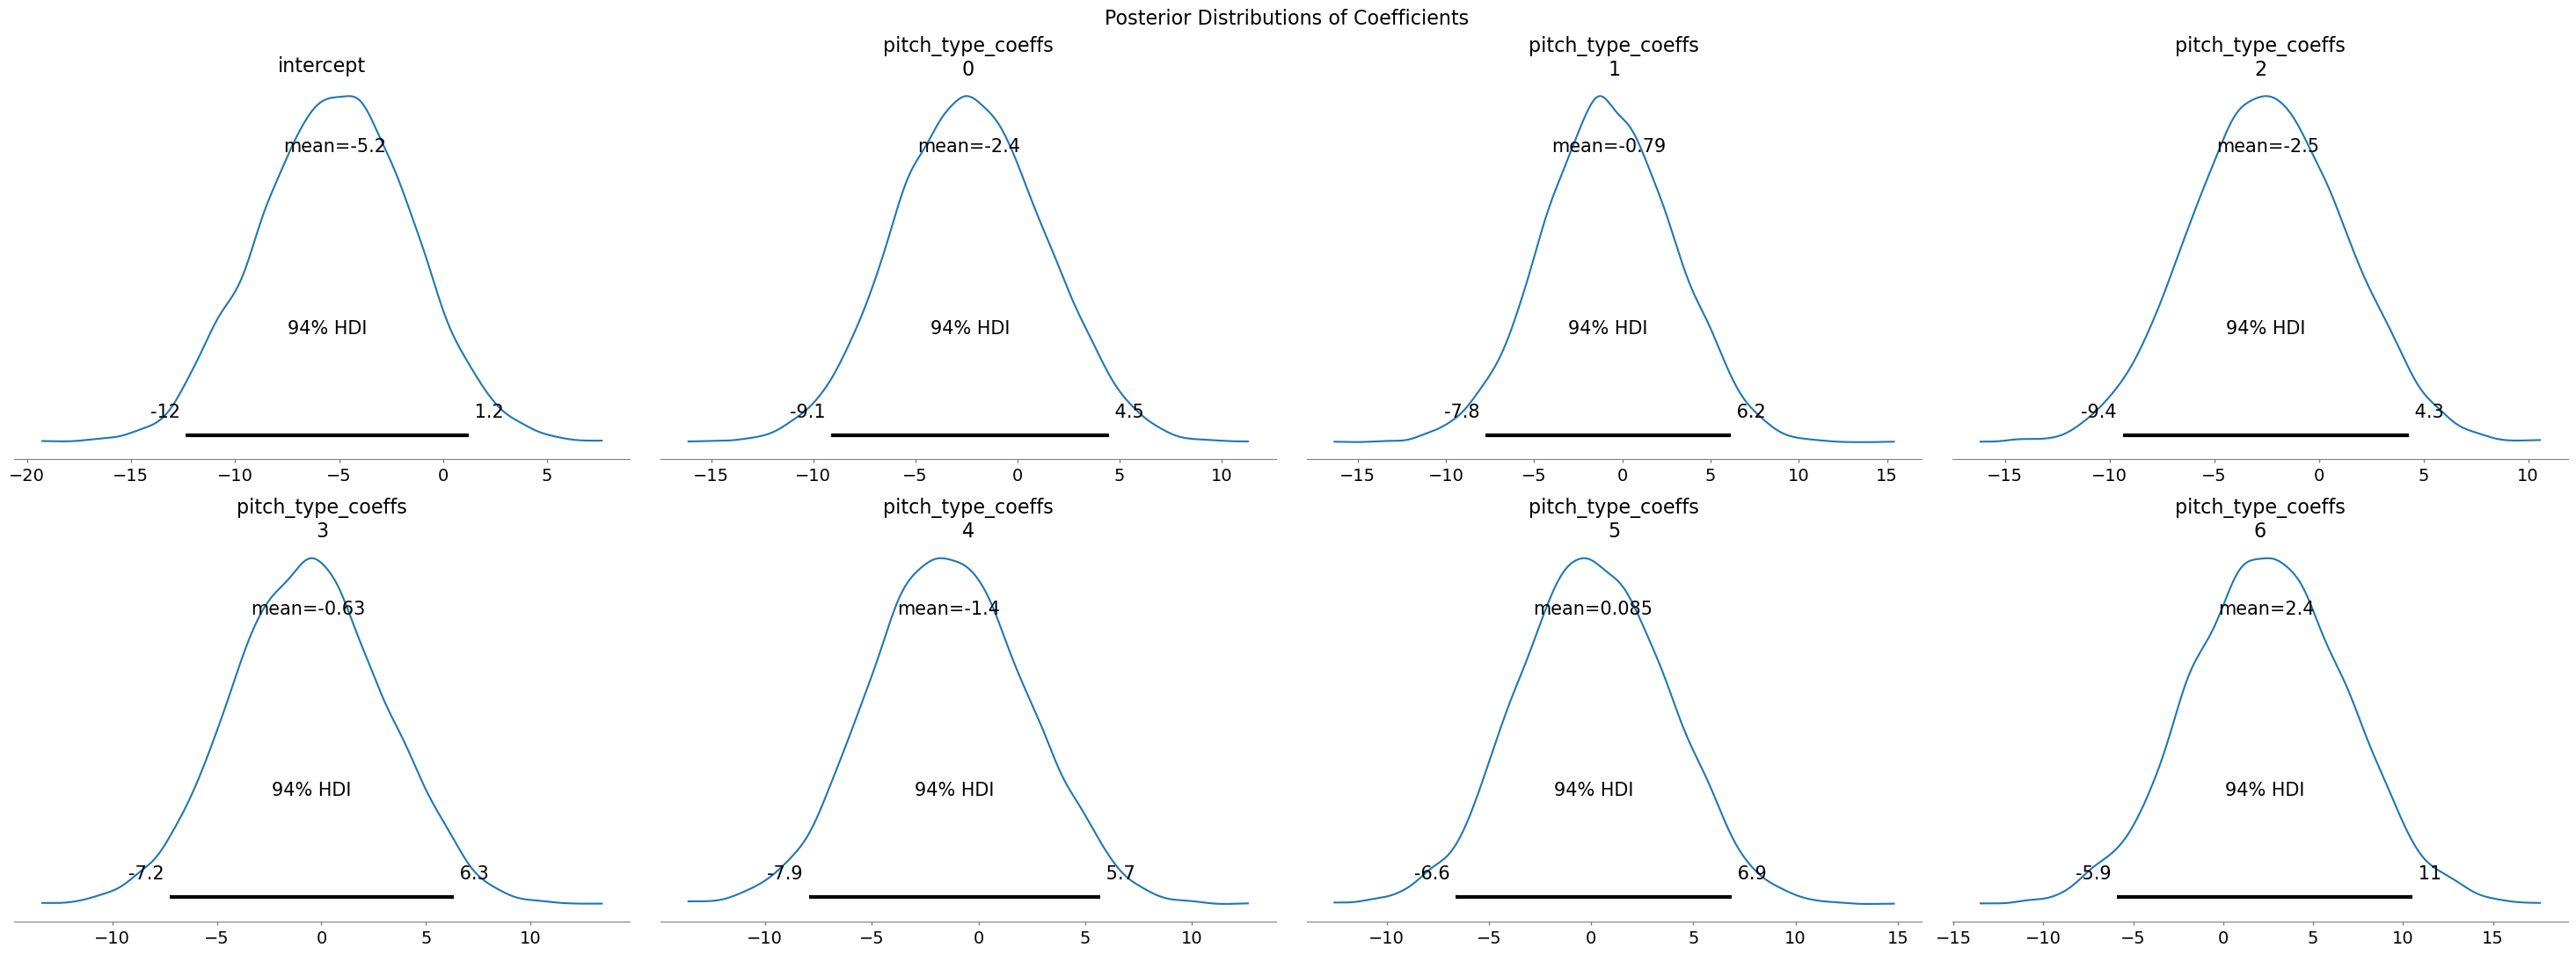

In [54]:
az.plot_posterior(trace, var_names=['intercept','pitch_type_coeffs'])
plt.suptitle('Posterior Distributions of Coefficients', fontsize=16)
plt.tight_layout()
plt.show()

In [42]:
# Encoded pitch_type
pitch_type_mapping = stratified_sample['pitch_type'].astype('category').cat.categories
print(pitch_type_mapping)


Index(['CH', 'CU', 'FC', 'FF', 'SI', 'SL', 'ST'], dtype='object')


# Analysis per Batter Batting Side of Plate (stand)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [intercept, pitch_speed_coeff, plate_x_coeff, plate_z_coeff, sz_top_coeff, sz_bot_coeff, stand_coeff, batter_random_effect, pitcher_random_effect, batter_pitch_type_random_effect]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 1857 seconds.


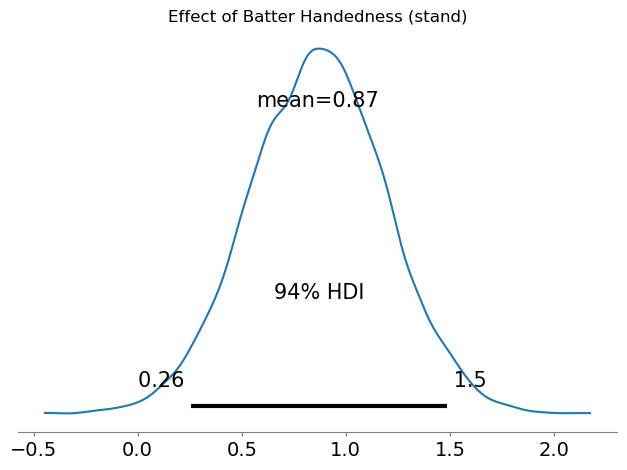

In [43]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt


continuous_cols = ['release_speed', 'pfx_x', 'pfx_z', 'sz_top', 'sz_bot']
filtered_data[continuous_cols] =filtered_data[continuous_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=0)


n_samples = 5000 
stratified_sample = filtered_data.groupby(['pitch_type', 'batter'], group_keys=False).apply(
    lambda x: x.sample(frac=n_samples / len(filtered_data), random_state=42)
)

pitch_speeds = stratified_sample['release_speed'].values
plate_x = stratified_sample['plate_x'].values
plate_z = stratified_sample['plate_z'].values
sz_top = stratified_sample['sz_top'].values
sz_bot = stratified_sample['sz_bot'].values
stands = stratified_sample['stand'].values  
strikes = stratified_sample['Strike'].values


stratified_sample['batter'] = stratified_sample['batter'].astype('category').cat.codes
stratified_sample['pitcher'] = stratified_sample['pitcher'].astype('category').cat.codes
pitch_type = stratified_sample['pitch_type'].astype('category').cat.codes.values

batters = stratified_sample['batter'].values
pitchers = stratified_sample['pitcher'].values
n_batters = len(stratified_sample['batter'].unique())
n_pitchers = len(stratified_sample['pitcher'].unique())
n_pitch_types = len(stratified_sample['pitch_type'].unique())

# Build PyMC model
with pm.Model() as model:
    # Fixed effects
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    pitch_speed_coeff = pm.Normal('pitch_speed_coeff', mu=0, sigma=10)
    plate_x_coeff = pm.Normal('plate_x_coeff', mu=0, sigma=10)
    plate_z_coeff = pm.Normal('plate_z_coeff', mu=0, sigma=10)
    sz_top_coeff = pm.Normal('sz_top_coeff', mu=0, sigma=10)
    sz_bot_coeff = pm.Normal('sz_bot_coeff', mu=0, sigma=10)
    stand_coeff = pm.Normal('stand_coeff', mu=0, sigma=10)  

    # Random effects
    batter_random_effect = pm.Normal('batter_random_effect', mu=0, sigma=10, shape=n_batters)
    pitcher_random_effect = pm.Normal('pitcher_random_effect', mu=0, sigma=10, shape=n_pitchers)
    batter_pitch_type_random_effect = pm.Normal(
        'batter_pitch_type_random_effect', mu=0, sigma=10, shape=(n_batters, n_pitch_types)
    )

    # Linear predictor
    linear_model = (
        intercept
        + pitch_speed_coeff * pitch_speeds
        + plate_x_coeff * plate_x
        + plate_z_coeff * plate_z
        + sz_top_coeff * sz_top
        + sz_bot_coeff * sz_bot
        + stand_coeff * stands  
        + batter_random_effect[batters]
        + pitcher_random_effect[pitchers]
        + batter_pitch_type_random_effect[batters, pitch_type]
    )

    # Logistic transformation and likelihood
    strike_prob = pm.Deterministic('strike_prob', pm.math.sigmoid(linear_model))
    likelihood = pm.Bernoulli('likelihood', p=strike_prob, observed=strikes)

    # Sampling
    trace = pm.sample(5000, chains=2, cores=1, return_inferencedata=True)

# Posterior summary and plot
summary_stats = az.summary(trace, var_names=['stand_coeff'], hdi_prob=0.95)
# print(summary_stats)

az.plot_posterior(trace, var_names=['stand_coeff'])
plt.title('Effect of Batter Handedness (stand)')
plt.tight_layout()
plt.show()


In [46]:
summary_stats

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
stand_coeff,0.866,0.328,0.232,1.507,0.005,0.003,4618.0,5740.0,1.0


# Contrast: Slider vs Sweeper by Batter Handedness

arviz - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


                 mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
Left_SL_vs_ST   0.541  0.791    -0.988      2.095      0.006    0.007   
Right_SL_vs_ST  0.238  0.648    -0.978      1.569      0.006    0.006   

                ess_bulk  ess_tail  r_hat  
Left_SL_vs_ST    15172.0    6871.0    NaN  
Right_SL_vs_ST   13279.0    7866.0    NaN  


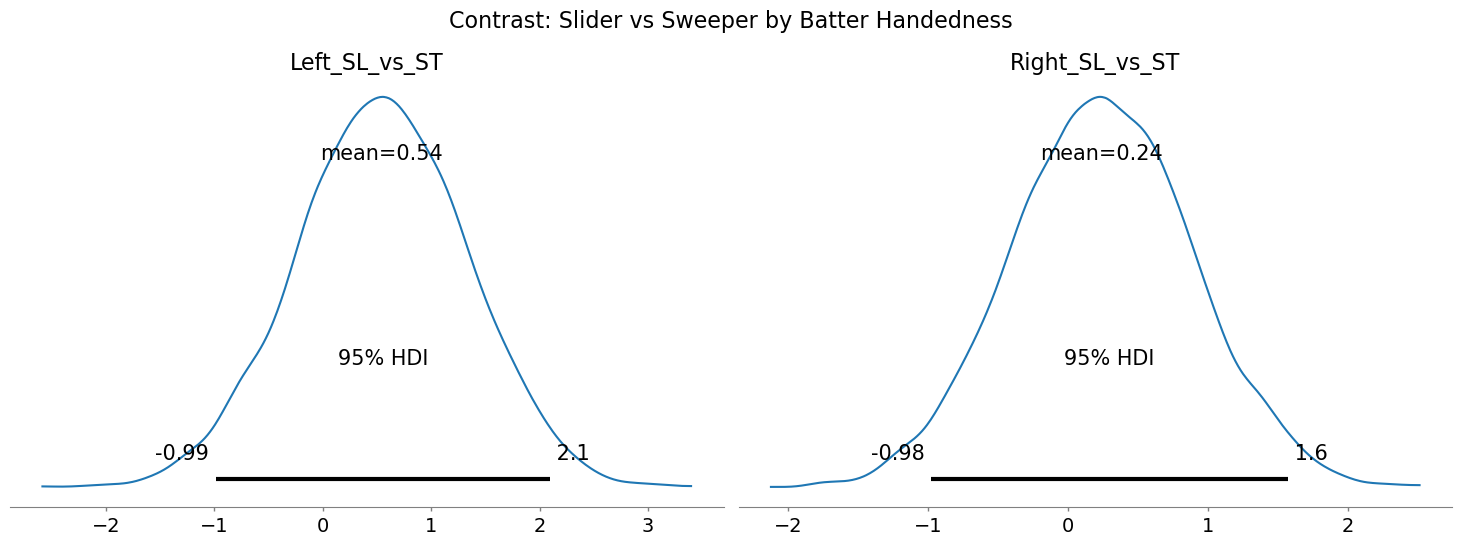

In [47]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Extract posterior samples for batter-pitch_type effects
batter_pitch_type_effects = trace.posterior['batter_pitch_type_random_effect'].values


# Get pitch type codes (SL = Slider, ST = Splitter)
pitch_type_categories = stratified_sample['pitch_type'].astype('category').cat.categories
slider_code = pitch_type_categories.get_loc('SL')
sweeper_code = pitch_type_categories.get_loc('ST')

# Compute contrast per batter (SL - ST)
contrast_samples = batter_pitch_type_effects[:, :, :, slider_code] - batter_pitch_type_effects[:, :, :, sweeper_code]
contrast_samples_flat = contrast_samples.reshape(-1, contrast_samples.shape[2]).T  # shape: (n_batters, total_samples)

# Build map from batter_idx to handednesnd
batter_stand_map = stratified_sample[['batter', 'stand']].drop_duplicates().set_index('batter')['stand']

# Group batter indices
left_indices = batter_stand_map[batter_stand_map == -1].index.tolist()  # 0 = Left
right_indices = batter_stand_map[batter_stand_map == 1].index.tolist() # 1 = Right


# Extract contrast samples for each group
contrast_left = contrast_samples_flat[left_indices]
contrast_right = contrast_samples_flat[right_indices]

# Average contrast per draw across batters for each group
contrast_left_avg = contrast_left.mean(axis=0)
contrast_right_avg = contrast_right.mean(axis=0)

# Create ArviZ InferenceData and plot
idata_contrast = az.convert_to_inference_data({
    'Left_SL_vs_ST': contrast_left_avg,
    'Right_SL_vs_ST': contrast_right_avg
})

# Summary
summary = az.summary(idata_contrast, hdi_prob=0.95)
print(summary)

# Plot
az.plot_posterior(idata_contrast, hdi_prob=0.95)
plt.suptitle("Contrast: Slider vs Sweeper by Batter Handedness", fontsize=16)
plt.tight_layout()
plt.show()


In [48]:
summary

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Left_SL_vs_ST,0.541,0.791,-0.988,2.095,0.006,0.007,15172.0,6871.0,NaN
Right_SL_vs_ST,0.238,0.648,-0.978,1.569,0.006,0.006,13279.0,7866.0,NaN


# SL vs ST in 2-Strike Counts by Batter Handedness

arviz - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


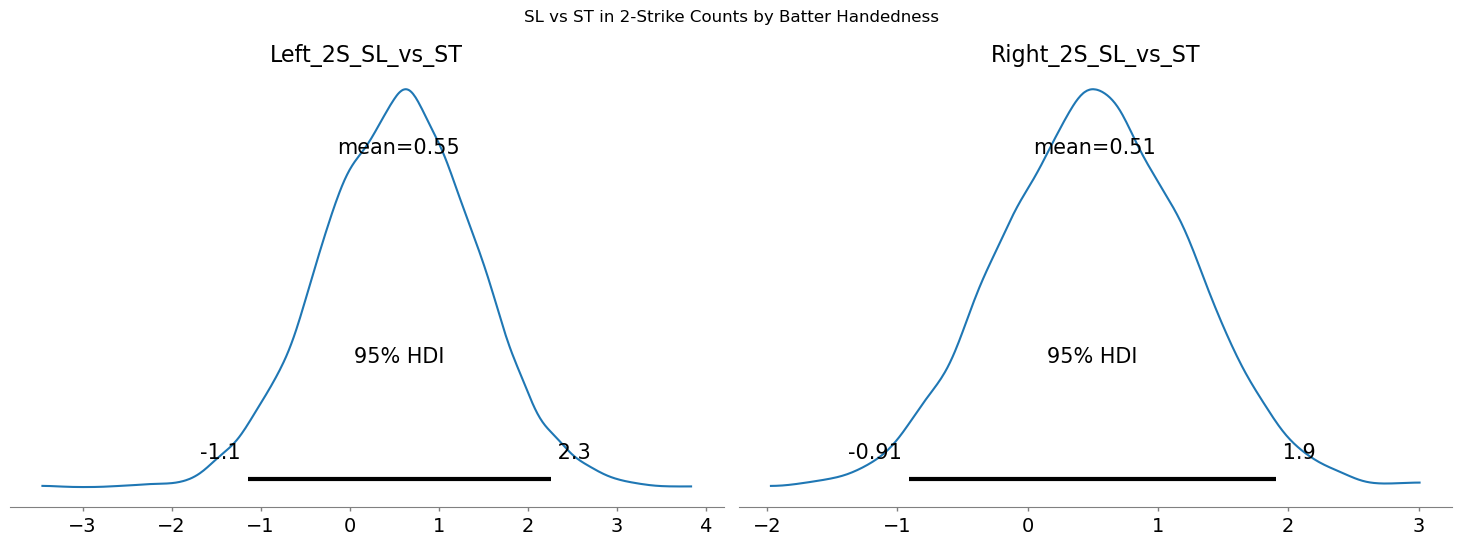

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Left_2S_SL_vs_ST,0.553,0.867,-1.146,2.265,0.007,0.007,13782.0,7261.0,NaN
Right_2S_SL_vs_ST,0.514,0.727,-0.912,1.905,0.006,0.006,12880.0,8073.0,NaN


In [51]:
# Filter stratified_sample for the 2-strike counts
two_strike_sample = stratified_sample[stratified_sample['strikes'] == 2].copy()

# Step 2: Get handedness map again from 2-strike sample
batter_stand_map_2s = two_strike_sample[['batter', 'stand']].drop_duplicates().set_index('batter')['stand']

# Extract pitch type contrast 
batter_pitch_type_effects = trace.posterior['batter_pitch_type_random_effect'].values
contrast_samples = batter_pitch_type_effects[:, :, :, slider_code] - batter_pitch_type_effects[:, :, :, sweeper_code]
contrast_samples_flat = contrast_samples.reshape(-1, contrast_samples.shape[2]).T  # shape: (n_batters, total_samples)

# Separate indices by hand in 2-strike count subset
left_indices_2s = batter_stand_map_2s[batter_stand_map_2s == -1].index.tolist()
right_indices_2s = batter_stand_map_2s[batter_stand_map_2s == 1].index.tolist()

# Extract and average contrast samples
contrast_left_2s = contrast_samples_flat[left_indices_2s].mean(axis=0)
contrast_right_2s = contrast_samples_flat[right_indices_2s].mean(axis=0)

# Convert to ArviZ
idata_2s = az.convert_to_inference_data({
    'Left_2S_SL_vs_ST': contrast_left_2s,
    'Right_2S_SL_vs_ST': contrast_right_2s
})

# Summary and Plot
summary=az.summary(idata_2s, hdi_prob=0.95)
az.plot_posterior(idata_2s, hdi_prob=0.95)
plt.suptitle("SL vs ST in 2-Strike Counts by Batter Handedness")
plt.tight_layout()
plt.show()
summary

# SL vs Other Pitch Types by Batter Handedness (Full Count: 3-2)

arviz - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


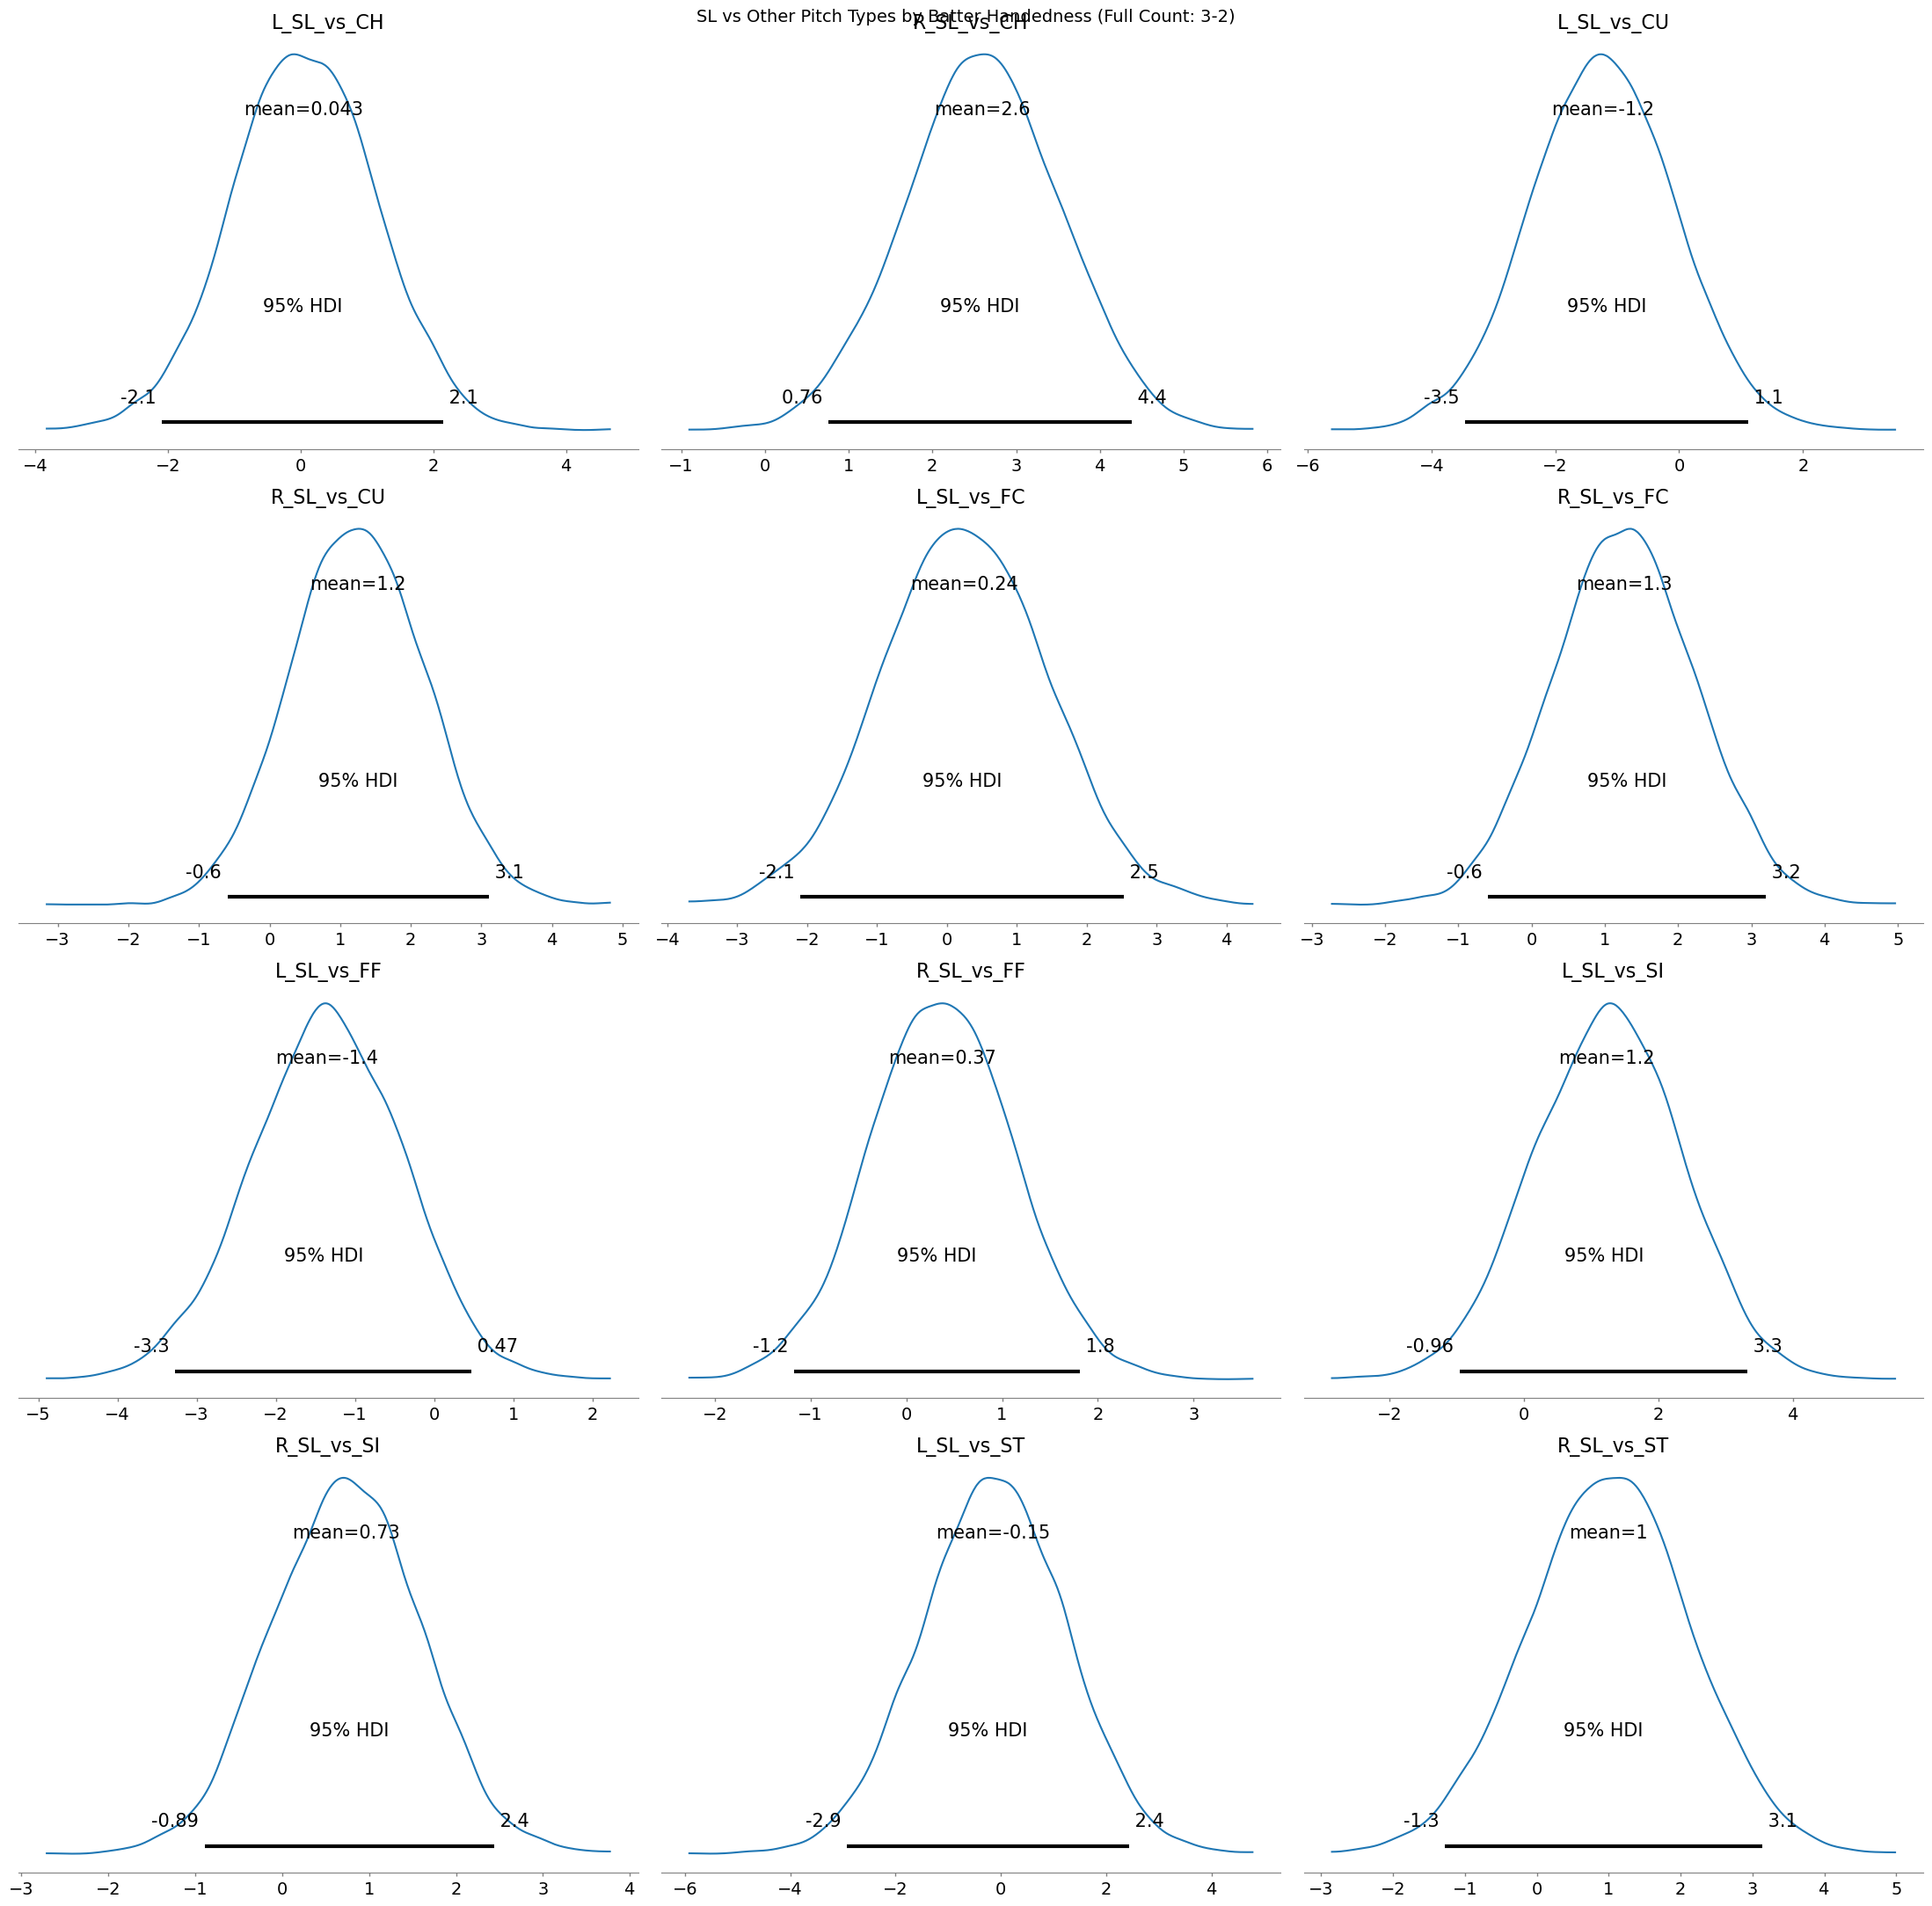

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
L_SL_vs_CH,0.043,1.087,-2.092,2.142,0.010,0.010,10785.0,7756.0,NaN
R_SL_vs_CH,2.591,0.928,0.763,4.376,0.009,0.007,10755.0,8446.0,NaN
L_SL_vs_CU,-1.234,1.167,-3.457,1.113,0.011,0.009,11461.0,8005.0,NaN
R_SL_vs_CU,1.246,0.950,-0.597,3.103,0.009,0.007,11045.0,8444.0,NaN
L_SL_vs_FC,0.241,1.180,-2.100,2.534,0.011,0.010,11619.0,8392.0,NaN
R_SL_vs_FC,1.257,0.979,-0.597,3.201,0.009,0.007,10848.0,7531.0,NaN
L_SL_vs_FF,-1.355,0.957,-3.270,0.472,0.010,0.007,9626.0,7552.0,NaN
R_SL_vs_FF,0.374,0.757,-1.174,1.811,0.008,0.006,7994.0,8006.0,NaN
L_SL_vs_SI,1.230,1.104,-0.959,3.325,0.011,0.008,10351.0,8343.0,NaN
R_SL_vs_SI,0.731,0.856,-0.892,2.438,0.010,0.008,8050.0,6833.0,NaN


In [52]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt


# Filter for full count pitches (balls=3, strikes=2)

full_count_data = stratified_sample[
    (stratified_sample['balls'] == 3) & (stratified_sample['strikes'] == 2)
].copy()

# Drop rows with missing handedness
full_count_data = full_count_data.dropna(subset=['stand'])

# Get pitch labels and index of SL
pitch_labels = stratified_sample['pitch_type'].astype('category').cat.categories.tolist()
slider_idx = pitch_labels.index('SL')

# Build batter → stand map (mode of handedness in full count only)
batter_stand_map = (
    full_count_data[['batter', 'stand']]
    .dropna()
    .groupby('batter')['stand']
    .agg(lambda x: x.mode().iloc[0])
)

# Build mapping: batter index used in model (after encoding) → handedness
batter_index_lookup = pd.Series(
    stratified_sample['batter'].values,
    index=stratified_sample['batter'].astype(str)
).drop_duplicates()

# Map model indices to stand values
batter_index_to_hand = {}
for batter, stand in batter_stand_map.items():
    batter_str = str(batter)
    if batter_str in batter_index_lookup.index:
        model_index = batter_index_lookup[batter_str]
        batter_index_to_hand[model_index] = stand

# Group indices by handedness
left_idx = [i for i, s in batter_index_to_hand.items() if s == -1]
right_idx = [i for i, s in batter_index_to_hand.items() if s == 1]


# Extract and compute contrast from posterior

# Flatten posterior to (samples, batters, pitch_types)
bpt_effects = trace.posterior['batter_pitch_type_random_effect'].values
bpt_flat = bpt_effects.reshape(-1, bpt_effects.shape[2], bpt_effects.shape[3])

contrast_dict = {}

for i, pitch_label in enumerate(pitch_labels):
    if i == slider_idx:
        continue  # Skip SL vs SL

    # SL - other pitch
    contrast_all = bpt_flat[:, :, slider_idx] - bpt_flat[:, :, i]

    if left_idx:
        L_contrast = contrast_all[:, left_idx].mean(axis=1)
        contrast_dict[f"L_SL_vs_{pitch_label}"] = L_contrast

    if right_idx:
        R_contrast = contrast_all[:, right_idx].mean(axis=1)
        contrast_dict[f"R_SL_vs_{pitch_label}"] = R_contrast


# Convert to ArviZ + Plot

idata_contrast = az.convert_to_inference_data(contrast_dict)

# Summary
summary = az.summary(idata_contrast, hdi_prob=0.95)
# print(summary)

# Plot
az.plot_posterior(idata_contrast, hdi_prob=0.95)
plt.suptitle("SL vs Other Pitch Types by Batter Handedness (Full Count: 3-2)", fontsize=14)
plt.tight_layout()
plt.show()
summary